In [94]:
"""Imports"""


import numpy as np

import matplotlib.pyplot as plt

import chromadb
from matplotlib import pyplot as plt
from sklearn.cluster import  OPTICS, HDBSCAN

import hdbscan

ModuleNotFoundError: No module named 'flask'

In [87]:
"""Prepare DB Connection"""

db = chromadb.PersistentClient(path="books.chromadb")
col = db.get_collection(name="books")

In [88]:
"""Prepare query list and emebeding"""
query = col.get( limit=5_000, include=[ "embeddings"])
embeddings = np.asarray(query["embeddings"])
ids = np.asarray(query["ids"])

In [89]:
clusterer = OPTICS(metric="cosine", min_samples=20, xi=0.5, min_cluster_size=0.05)
clusters = clusterer.fit(embeddings)

KeyboardInterrupt: 

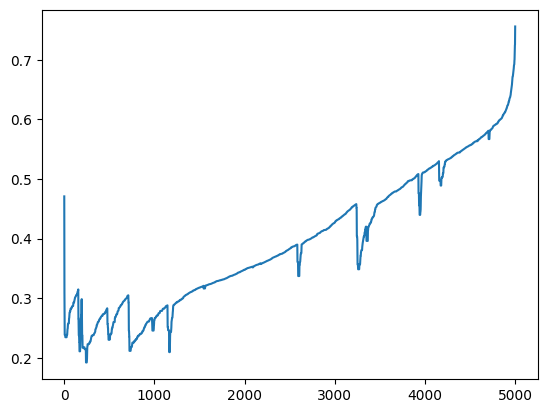

In [ ]:
results = []
ids_ordered = ids[clusters.ordering_]
distances = clusters.reachability_[clusters.ordering_]


plt.plot(distances)



In [ ]:
""" Let's do some HDSCAN instead """

clusterer = HDBSCAN( min_samples=10, metric="l2")
clusterer.fit(embeddings)

HDBSCAN(metric='l2', min_samples=10)

In [ ]:
clusterer.condensed_tree_.plot()

AttributeError: 'HDBSCAN' object has no attribute 'condensed_tree_'

In [ ]:
# """Compute hierarchical structure"""

# cos_scores = np.matmul(embeddings, embeddings.T)  # cosine score
# np.fill_diagonal(cos_scores, 1.0)  # force diagonl at 1 (float precision)
# cos_scores = np.clip(cos_scores, -1, 1)  # force bound the limits (float precision)

# #  Interpret the distance in angles (degree)
# distance_matrix = np.rad2deg(np.arccos(cos_scores))
# distance_matrix = (
#     distance_matrix + distance_matrix.T
# ) / 2  # force symmetrie (float precision)


In [5]:
# """Compute hierarchical structure"""

# sqf = squareform(distance_matrix)
# links = hierarchy.linkage(sqf, method="ward")

In [7]:
# """Multi level  fcluster"""


# factors = [0.5 , 0.15, 0.01]
# lmax = links[:, 2].max()
# nb_levels = len(factors)

# levels = [ 
#     hierarchy.fcluster(links, t=f*lmax, criterion='distance')
#     for f in factors
# ]


# def map_cluster(cluster: int, depth:int, clusters_levels:list[list[int]]): 
#     # Base case:  we are at the query level
#     if depth == len(clusters_levels)-1: 
#         return {
#             "name" : f"{depth}-{cluster}",
#         }

#     # Recurssive case
#     level = clusters_levels[depth]
#     level_bellow = clusters_levels[depth+1]
#     cluster_indexs = [i for i, c in enumerate(level) if c == cluster]
#     cluster_to_map = list(set([c for i, c in enumerate(level_bellow) if i in cluster_indexs]))

#     return {
#         "name": f"{depth}-{cluster}",
#         "children" : [
#             map_cluster(c, depth+1, clusters_levels) for c in cluster_to_map
#         ]
#     }

# graph = { 
#     "name" : "0-0",
#     "children" : [map_cluster(c, 0, levels) for c in set(levels[0])  ],
# } 

# with open("/home/sebastien/repos/openlibrary-carthography/front/src/graph.json", "w") as f:
#     json.dump(graph, f, indent=2)